Notebook to reproduce the conformer categorization analysis as introduced in [1] J. Chem. Inf. Model. 2024, 64, 20, 7917–7924

In [5]:
from plots import PlotConfusionMatrixSchema, PlotPpvNpv
import pandas as pd
import numpy as np
from helpers import GetMetrics

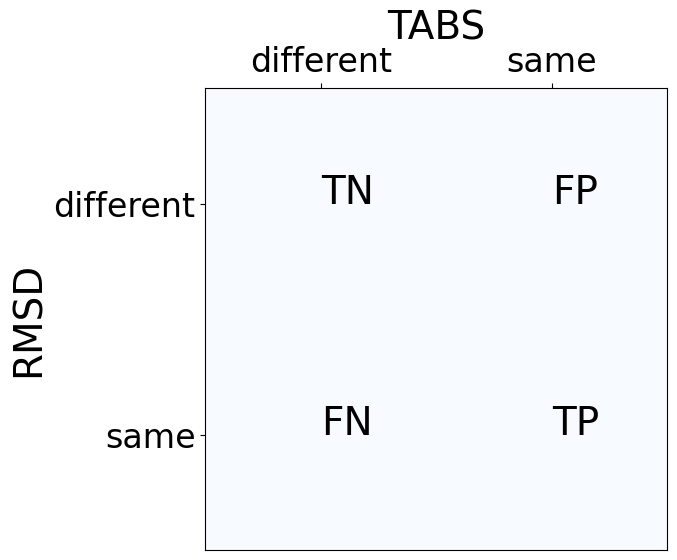

In [6]:
PlotConfusionMatrixSchema("RMSD");

Reading in the example data we got from executing `ConformerGenerationAndTabsRmsdTfd.py` script in Data/TABS/Scripts, for details see README there

In [ ]:
data = pd.read_csv("../Data/TABS/Output/1ae03752-506f-432c-9508-f69cc98c58d4_prevMetrics.txt") # example molecule 1
data.head()
data2 = pd.read_csv("../Data/TABS/Output/947e5e0c-f189-43c4-861e-55a7a194dcc2_prevMetrics.txt") # example molecule 2
# Combine the two datasets  
data = pd.concat([data, data2], ignore_index=True)
data

,cid1,cid2,tabsAgreement,rmsd,tfd
0,1,0,0,0.544619,0.024380
1,2,0,0,0.759982,0.046641
2,2,1,0,1.001924,0.235113
3,3,0,0,1.004785,0.255027
4,3,1,0,1.124435,0.266119
...,...,...,...,...,...
9895,99,94,0,3.203047,0.199602
9896,99,95,0,3.027774,0.140416
9897,99,96,0,2.259663,0.032122
9898,99,97,0,1.798308,0.300779


Scanning the thresholds

In [8]:
cutoffsRmsd = np.arange(0.1,2.2,0.1)
cutoffsRmsd

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1])

In [9]:
res = [GetMetrics(data['rmsd'], data['tabsAgreement'], comparisonid=3, comparisonMeasureCutoffTrue=c, comparisonMeasureCutoffPred=-1) for c in cutoffsRmsd]

In [11]:
cutoffs = np.round(cutoffsRmsd, 2)
npvs = [r['npv'] for r in res]
ppvs = [r['ppv'] for r in res]

"At each chosen threshold, the RMSD categorization was assumed as the ground truth and the TABS categorization as the prediction. Each confusion matrix was analyzed for two metrics, the positive predictive value (PPV, also known as precision) and the negative predictive value (NPV)." [1]

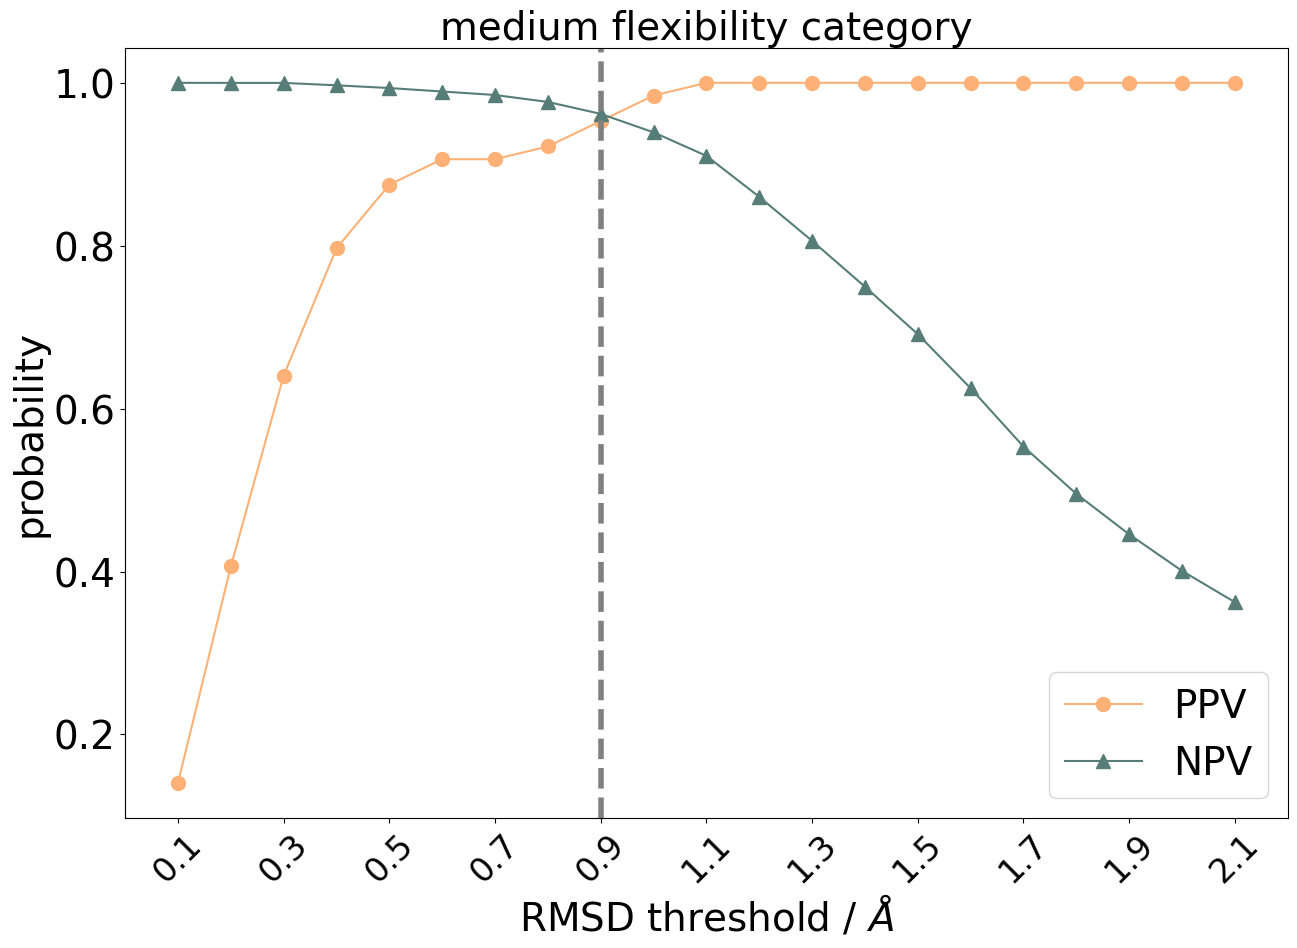

In [12]:
fig = PlotPpvNpv(r"RMSD threshold / $\AA$",cutoffs, npvs, ppvs, "medium flexibility category",0.9);